In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
from functions.evaluation import Evaluator, EvaluationResult
from pandas import read_csv

df_user = read_csv('../data/ridge_features_refined_data.csv')
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Area,2927.0,7.476842e-16,1.000171,-3.775920,-0.346207,0.120200,0.514420,6.272148
Overall_Qual,2927.0,6.090878e+00,1.406195,1.000000,5.000000,6.000000,7.000000,10.000000
Overall_Cond,2927.0,5.563717e+00,1.111960,1.000000,5.000000,5.000000,6.000000,9.000000
Mas_Vnr_Area,2927.0,0.000000e+00,1.000171,-0.790677,-0.790677,-0.790677,1.156440,2.029755
Exter_Qual,2927.0,2.396994e+00,0.578344,1.000000,2.000000,2.000000,3.000000,4.000000
...,...,...,...,...,...,...,...,...
Garage_Type_No_Garage,2927.0,5.363854e-02,0.225342,0.000000,0.000000,0.000000,0.000000,1.000000
Sale_Type_'WD ',2927.0,8.664161e-01,0.340263,0.000000,1.000000,1.000000,1.000000,1.000000
Year_Sold,2927.0,2.007791e+03,1.317120,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000
Mo_Sold,2927.0,6.215237e+00,2.712368,1.000000,4.000000,6.000000,8.000000,12.000000


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(df_user.shape[1]-1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

evaluator = Evaluator(model, df_user, 'Sale_Price')

2023-02-03 00:40:20.978996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 00:40:22.104197: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 00:40:22.104310: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-03 00:40:26.760295: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
evaluator.split_dataset()

tcv = evaluator.temporal_cv(n_splits=10, epochs=1500, verbose=True)
tcv

6/6 [==============================] - 1s 4ms/step
[Split 0/10] - train_size: 0.093
r2: 0.84595  -  explained_variance: 0.92433  -  rmse: 0.35768  -  mae: 0.27824  -  max_error: 1.40687

6/6 [==============================] - 0s 5ms/step
[Split 1/10] - train_size: 0.183
r2: 0.92166  -  explained_variance: 0.92851  -  rmse: 0.28531  -  mae: 0.17024  -  max_error: 1.21232

6/6 [==============================] - 0s 5ms/step
[Split 2/10] - train_size: 0.274
r2: 0.88315  -  explained_variance: 0.88335  -  rmse: 0.36876  -  mae: 0.15894  -  max_error: 1.64726

6/6 [==============================] - 0s 6ms/step
[Split 3/10] - train_size: 0.365
r2: 0.92596  -  explained_variance: 0.92916  -  rmse: 0.25165  -  mae: 0.14977  -  max_error: 1.05482

6/6 [==============================] - 0s 2ms/step
[Split 4/10] - train_size: 0.456
r2: 0.90821  -  explained_variance: 0.91399  -  rmse: 0.26980  -  mae: 0.12367  -  max_error: 1.56443

6/6 [==============================] - 1s 14ms/step
[Split 5/10] 

r2:                  0.89066
explained_variance:  0.90086
rmse:                0.32441
mae:                 0.18040
max_error:           1.54279

In [5]:
evaluator.split_dataset()
res = evaluator.evaluate(epochs=1500)
res

31/31 [==============================] - 0s 1ms/step


r2:                  0.87543
explained_variance:  0.87767
rmse:                0.35669
mae:                 0.17787
max_error:           2.65293

31/31 [==============================] - 0s 1ms/step


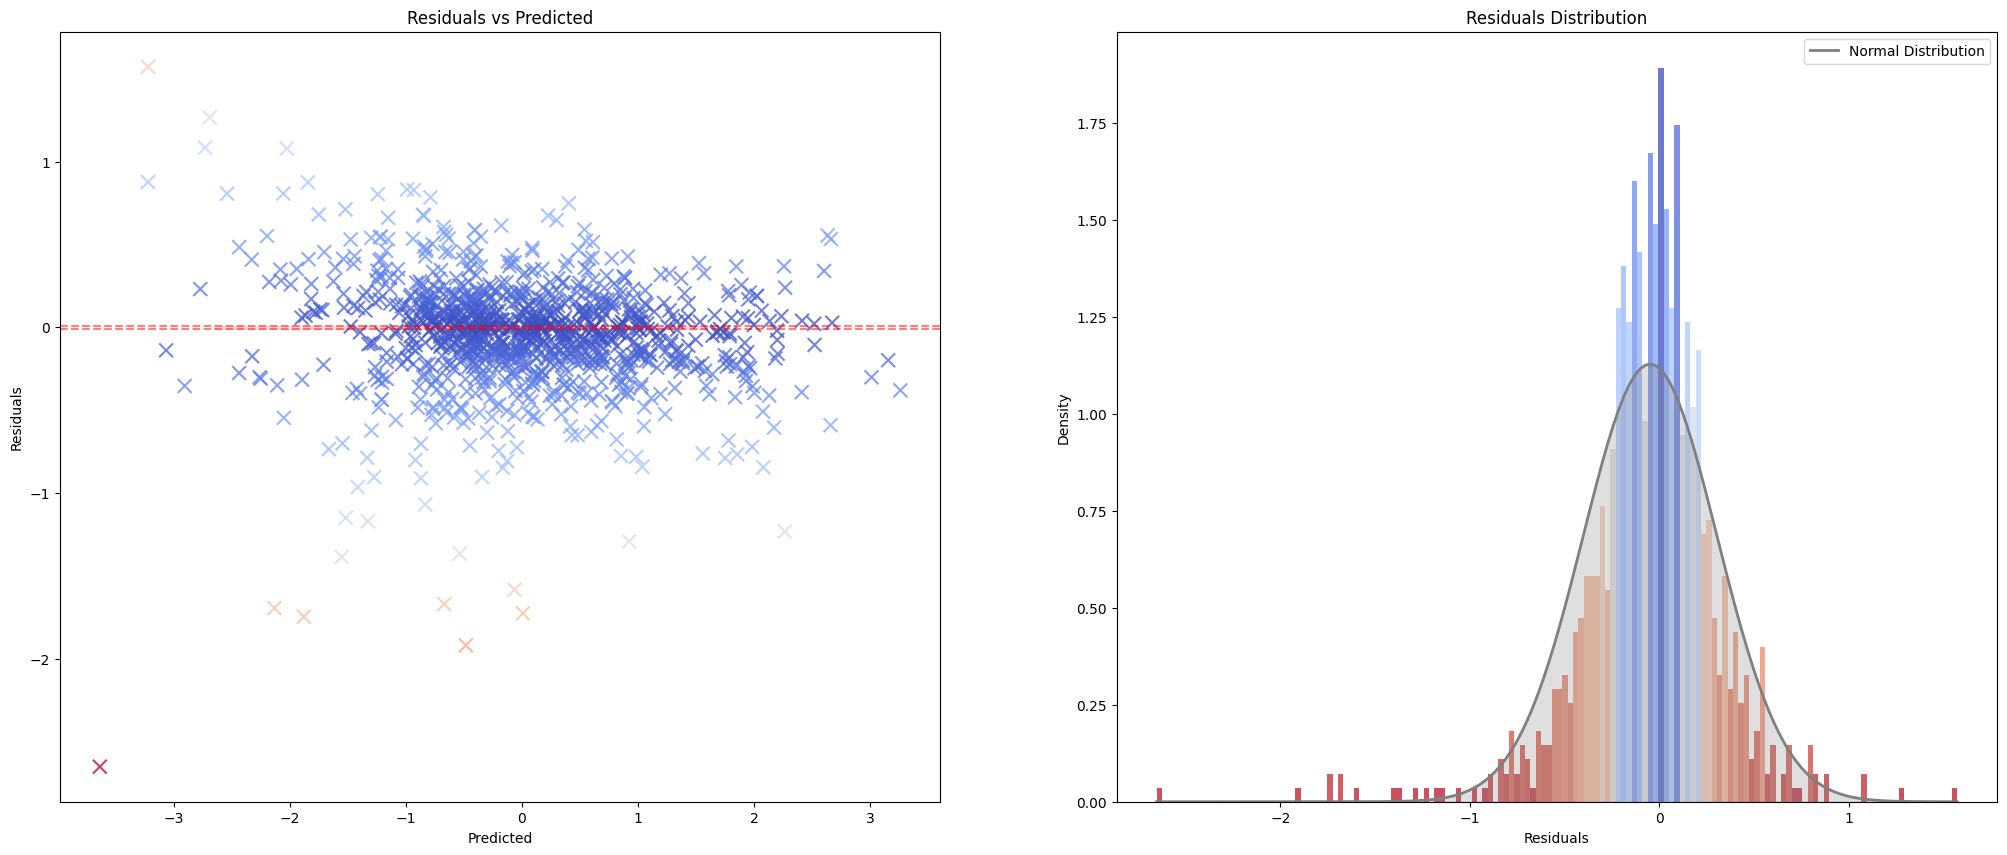

In [6]:
evaluator.plot_residuals()